In [1]:
import sys
sys.path.append('../src')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pipeline import SearchEngine
from relevance import run_relevance_tests

/home/zim/.virtualenvs/SI650/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_PATH = '../data/'
RELEVANCE_TEST_PATH = DATA_PATH + 'relevance.test.csv'

In [3]:
search_engine = SearchEngine(max_docs=-1, l2r=False)

Initializing Search Engine...
Loading doc augment dict...


600001it [00:00, 995415.11it/s] 


Loading indexes...


100%|██████████| 200000/200000 [00:16<00:00, 11949.73it/s]


Loading raw text dict...


9605it [00:00, 997975.87it/s]

Loading ranker...
Search Engine initialized!


In [4]:
overall_scores = []

In [5]:
def log_scores(overall_scores, score, idx):
    for item in score['map_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'map'
        })
    for item in score['ndcg_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'ndcg'
        })
    return overall_scores

In [6]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 0)

  0%|          | 0/37 [00:00<?, ?it/s]

100%|██████████| 37/37 [01:44<00:00,  2.83s/it]

MAP:  [0.025, 0.05, 0.18285714285714286, 0, 0, 0.26, 0.01, 0, 0.02, 0, 0.09, 0, 0, 0.0325, 0, 0, 0.03333333333333333, 0, 0.039285714285714285, 0, 0.16666666666666666, 0.11666666666666665, 0, 0, 0.06666666666666667, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0.15, 0]
NDCG:  [0.20934459014771417, 0.1912049197383063, 0.39716165665539105, 0.0, 0.0, 0.35738444023216115, 0.0586666388908508, 0.0, 0.13279625411320248, 0.0, 0.38788542353712996, 0.04541743105845887, 0.0, 0.13628418466142134, 0.0, 0.06617289012360779, 0.16326880032415683, 0.0, 0.2636251908292501, 0.0, 0.3293683421236114, 0.3403003929241778, 0.07119751906546767, 0.07242198498924948, 0.21928535165731325, 0.0, 0.0, 0.0, 0.054633798952207324, 0.0, 0.0, 0.2578062004518628, 0.0, 0.0, 0.17808233551818767, 0.3040695800485996, 0.13058065054168094]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [7]:
search_engine.set_l2r(True)
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 1)

Loading categories...
Loading recognized categories...


100%|██████████| 200000/200000 [00:00<00:00, 667979.60it/s]


Loading network features...


999842it [00:01, 839094.61it/s]


Loading L2R ranker...
Training L2R ranker...
Training model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2390
[LightGBM] [Info] Number of data points in the train set: 9604, number of used features: 122


100%|██████████| 37/37 [02:34<00:00,  4.18s/it]

MAP:  [0.01, 0, 0.014285714285714285, 0.05, 0.05, 0.3, 0.016666666666666666, 0, 0.02, 0, 0.19166666666666665, 0.016666666666666666, 0, 0.01111111111111111, 0, 0.11666666666666665, 0.05, 0.025, 0, 0, 0.2, 0.025, 0, 0, 0.075, 0, 0, 0.1, 0, 0, 0, 0.1, 0, 0, 0, 0.1, 0.03333333333333333]
NDCG:  [0.27954482978104217, 0.02527111695503175, 0.06779095235709004, 0.19031326377064925, 0.4625615171528923, 0.5524908236514924, 0.07539233389643339, 0.0, 0.13279625411320248, 0.0, 0.4532167371076821, 0.08784930351173036, 0.0, 0.06777326424277086, 0.0, 0.5379558393713895, 0.2587749260515187, 0.10623644959942682, 0.0, 0.07072176408952598, 0.43542661591793985, 0.10432711530922105, 0.047465012710311776, 0.04569318514242297, 0.27122780309748196, 0.0, 0.0, 0.19031326377064925, 0.0, 0.0, 0.0, 0.2578062004518628, 0.0, 0.0, 0.5341155357661355, 0.20271305336573306, 0.09605944048975643]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [8]:
search_engine.set_ranker('VectorRanker')
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 2)

100%|██████████| 37/37 [04:53<00:00,  7.94s/it]

MAP:  [0, 0, 0, 0.05, 0.05, 0.4, 0.0125, 0, 0.02, 0, 0.275, 0.025, 0, 0, 0, 0.16666666666666666, 0.03333333333333333, 0, 0.02, 0, 0.13999999999999999, 0.025, 0, 0, 0.12222222222222223, 0, 0.016666666666666666, 0.12857142857142856, 0, 0, 0.02, 0, 0.01111111111111111, 0, 0, 0.1, 0.05]
NDCG:  [0.11418795826238955, 0.026702515150042617, 0.0, 0.19031326377064925, 0.4978307366162344, 0.6078648901000383, 0.06496211865470962, 0.0, 0.14843011901892328, 0.0, 0.547156902320375, 0.11354357764614717, 0.0, 0.0, 0.0, 0.5359085012734479, 0.16326880032415683, 0.0, 0.06803026604465859, 0.0, 0.3131560104471003, 0.10432711530922105, 0.0, 0.0, 0.2675929864368697, 0.0, 0.09257326393566936, 0.25810421612773926, 0.0, 0.0, 0.06633078729078071, 0.05509945288917899, 0.051337707291006625, 0.04907450405263811, 0.4908941438142847, 0.20271305336573306, 0.18772347133249384]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [9]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, 1, 0.5, 0.5)
log_scores(overall_scores, score, 3)

100%|██████████| 37/37 [05:55<00:00,  9.62s/it]

MAP:  [0, 0, 0, 0, 0.05, 0.38, 0.0125, 0, 0.06999999999999999, 0, 0.2816666666666666, 0.02, 0, 0, 0, 0.16666666666666666, 0.05, 0, 0.0125, 0, 0.16666666666666666, 0.03333333333333333, 0, 0, 0.1, 0, 0.0125, 0.13333333333333333, 0, 0, 0, 0, 0.01111111111111111, 0, 0, 0.1, 0.03333333333333333]
NDCG:  [0.05709397913119477, 0.026702515150042617, 0.0, 0.0, 0.4645143659943874, 0.582664289549951, 0.06496211865470962, 0.0, 0.23968928370633122, 0.0, 0.5335305586189745, 0.09780111442396344, 0.0, 0.0, 0.0, 0.5559022018444768, 0.2587749260515187, 0.0, 0.052653795343918175, 0.0, 0.3569887631594992, 0.13164616230573573, 0.0, 0.0, 0.20342085232311144, 0.0, 0.07976613861435583, 0.2639364841142927, 0.0, 0.04568214526619985, 0.0, 0.04879728075608627, 0.051337707291006625, 0.04228525090585263, 0.4994183879606134, 0.20271305336573306, 0.12007430061219554]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [10]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, mmr_lambda=0.3)
log_scores(overall_scores, score, 4)

100%|██████████| 37/37 [04:52<00:00,  7.90s/it]

MAP:  [0, 0.025, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.1, 0, 0, 0.05, 0, 0.13999999999999999, 0, 0, 0, 0.1, 0, 0, 0.1, 0, 0, 0.05555555555555556, 0, 0, 0, 0, 0.1, 0.016666666666666666]
NDCG:  [0.04067457141425403, 0.10013443181265981, 0.0, 0.0, 0.2542347178714698, 0.19031326377064925, 0.0, 0.0, 0.0, 0.0, 0.20026886362531962, 0.0, 0.0, 0.0, 0.0, 0.31689265655728094, 0.0, 0.0, 0.15796138603175455, 0.0, 0.3131560104471003, 0.0, 0.0, 0.0, 0.20342085232311144, 0.0, 0.0478596831686135, 0.19031326377064925, 0.0, 0.0, 0.1579058763577213, 0.0, 0.0, 0.08003706880121056, 0.2869561509255951, 0.20271305336573306, 0.07529126855420616]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [11]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, mmr_lambda=0.5)
log_scores(overall_scores, score, 5)

100%|██████████| 37/37 [04:48<00:00,  7.80s/it]

MAP:  [0, 0.02, 0, 0, 0, 0.12857142857142856, 0.01, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.1, 0, 0, 0.05, 0, 0.15, 0, 0.01111111111111111, 0, 0.1, 0, 0, 0.1, 0, 0, 0.05, 0, 0, 0, 0, 0.1, 0.03333333333333333]
NDCG:  [0.05709397913119477, 0.08625110487542241, 0.0, 0.0, 0.2542347178714698, 0.25810421612773926, 0.0586666388908508, 0.0, 0.06908640207330664, 0.0, 0.20026886362531962, 0.0, 0.0, 0.0, 0.0, 0.31689265655728094, 0.0, 0.0, 0.15796138603175455, 0.0, 0.3283299869700901, 0.0, 0.05989417754516622, 0.0, 0.20342085232311144, 0.0, 0.043221600650181706, 0.19031326377064925, 0.04518693084399215, 0.0, 0.1540153185664613, 0.0, 0.0, 0.08003706880121056, 0.2947465179238185, 0.20271305336573306, 0.11509076686682135]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [12]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, mmr_lambda=0.7)
log_scores(overall_scores, score, 6)

100%|██████████| 37/37 [04:51<00:00,  7.89s/it]

MAP:  [0, 0, 0, 0, 0, 0.22666666666666666, 0.03666666666666667, 0, 0, 0, 0.13999999999999999, 0, 0, 0, 0, 0.125, 0.016666666666666666, 0, 0.075, 0, 0.16666666666666666, 0, 0, 0, 0.1, 0, 0.01111111111111111, 0.1, 0, 0, 0.05, 0, 0, 0, 0, 0.1, 0.05]
NDCG:  [0.07204458036731731, 0.03098982883805059, 0.0, 0.0, 0.34371492625657846, 0.4090107370711167, 0.1340589727872842, 0.0, 0.06908640207330664, 0.0, 0.3054419086149138, 0.0, 0.0, 0.0, 0.03818738669051753, 0.44704170483261374, 0.10010780658494092, 0.0, 0.2106151813756727, 0.0, 0.3569887631594992, 0.0, 0.0, 0.0, 0.20342085232311144, 0.0, 0.07549024526895337, 0.19031326377064925, 0.0, 0.0, 0.1540153185664613, 0.0, 0.0, 0.04518693084399215, 0.2945305482836415, 0.20271305336573306, 0.18065073335703036]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [15]:
overall_scores = pd.DataFrame(overall_scores)
overall_scores

,model,score,metric
0,0,0.025000,map
1,0,0.050000,map
2,0,0.182857,map
3,0,0.000000,map
4,0,0.000000,map
...,...,...,...
513,6,0.000000,ndcg
514,6,0.045187,ndcg
515,6,0.294531,ndcg
516,6,0.202713,ndcg


/tmp/ipykernel_10993/720272392.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(models_list, rotation=45)


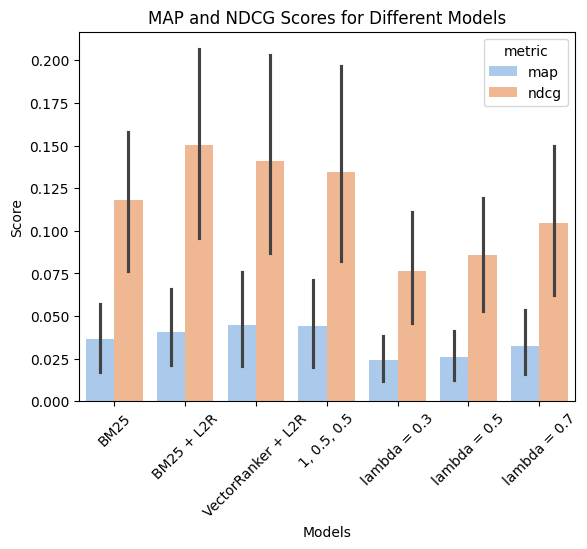

In [16]:
plot = sns.barplot(x='model', y='score', hue='metric',
                   data=overall_scores, palette='pastel')
models_list = ['BM25', 'BM25 + L2R', 'VectorRanker + L2R', '1, 0.5, 0.5',
               'lambda = 0.3', 'lambda = 0.5', 'lambda = 0.7']
plot.set_xticklabels(models_list, rotation=45)
plot.set_xlabel('Models')
plot.set_ylabel('Score')
plot.set_title('MAP and NDCG Scores for Different Models')
plt.show()